In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

In [ ]:
df = pd.read_csv('survey_data_updated.csv')
df.head()

In [136]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18845 entries, 0 to 18844
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 16.4+ MB


In [12]:
def process_count(df, column_name, new_column_names):
    count_dict = Counter(df[column_name].str.split(';').explode()) # Count occurrences of each technology in the selected column
    table = pd.DataFrame.from_dict(count_dict, orient='index', columns=['count']).reset_index() # Convert from Dictionary to Dataframe
    table.columns = new_column_names # Rename Columns
    table.sort_values(new_column_names[1], ascending=False, inplace=True) # Sort by the count column in descending order
    return table.head(10).reset_index(drop=True) # Select top 10 items and reset index

# Top 10 Current Languages, Database, Platform, and Webframe 
languages_current_year = process_count(df, 'LanguageHaveWorkedWith', ('Languages', 'Count Language'))
database_current_year = process_count(df, 'DatabaseHaveWorkedWith', ('Database', 'Count Database'))
Platform_current_year = process_count(df, 'PlatformHaveWorkedWith', ('Platform', 'Count Platform'))
Webframe_current_year = process_count(df, 'WebframeHaveWorkedWith', ('Webframe', 'Count Webframe'))

# Join All Top 10 Current Languages, Database, Platform, and Webframe 
current_tech = pd.concat([languages_current_year, database_current_year, Platform_current_year, Webframe_current_year], axis=1)

# Top 10 Desired Languages, Database, Platform, and Webframe 
languages_desired_year = process_count(df, 'LanguageWantToWorkWith', ('Languages', 'Count Language'))
database_desired_year = process_count(df, 'DatabaseWantToWorkWith', ('Database', 'Count Database'))
Platform_desired_year = process_count(df, 'PlatformWantToWorkWith', ('Platform', 'Count Platform'))
Webframe_desired_year = process_count(df, 'WebframeWantToWorkWith', ('Webframe', 'Count Webframe'))

# Join All Top 10 Desired Languages, Database, Platform, and Webframe
desired_tech = pd.concat([languages_desired_year, database_desired_year, Platform_desired_year, Webframe_desired_year], axis=1)

#### Data Visualization

Current technology Usage

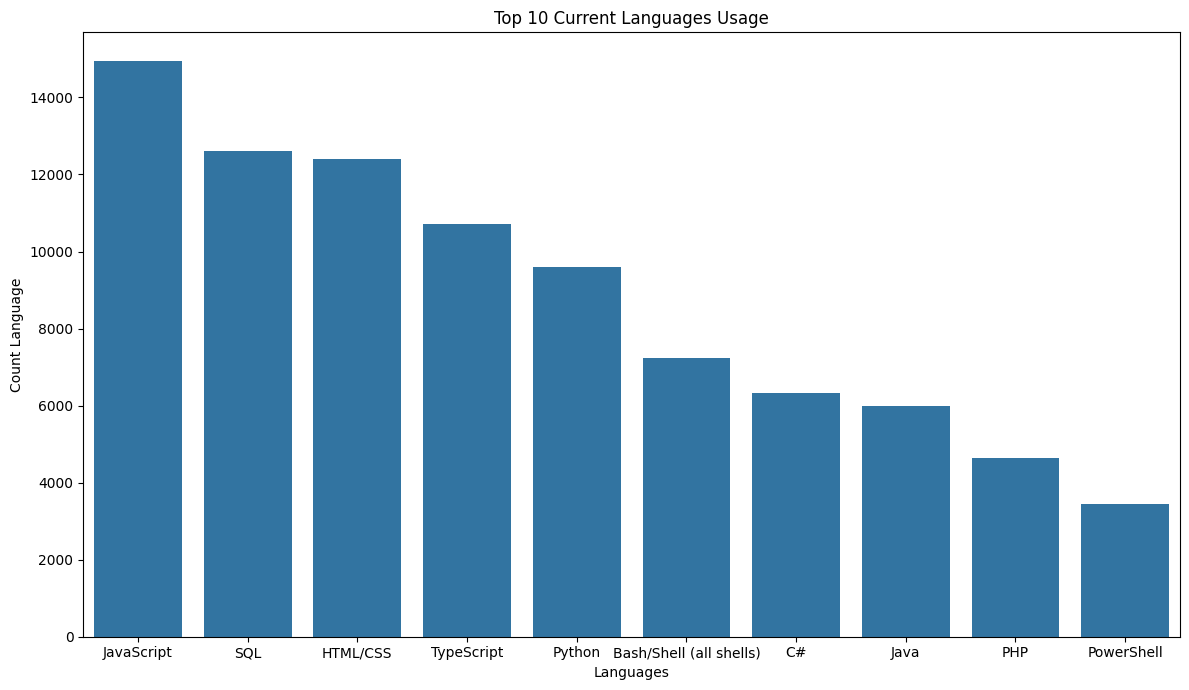

In [17]:
# Top 10 Languages

plt.figure(figsize=(12,7))
sns.barplot(data = languages_current_year, x = 'Languages', y = 'Count Language')
plt.title("Top 10 Current Languages Usage")
plt.tight_layout()

Text(0.5, 0, 'Count Language')

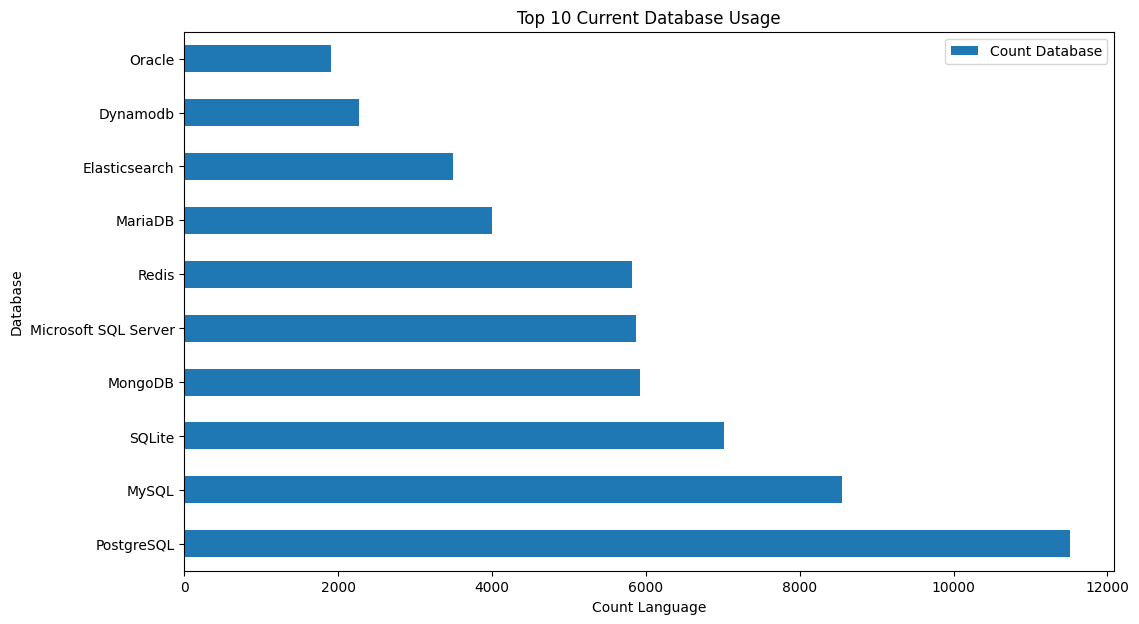

In [ ]:
# Top 10 Database

database_current_year.plot(kind='barh', x = 'Database', y = 'Count Database', figsize=(12,7))
plt.title("Top 10 Current Database Usage")
plt.xlabel("Count Language")

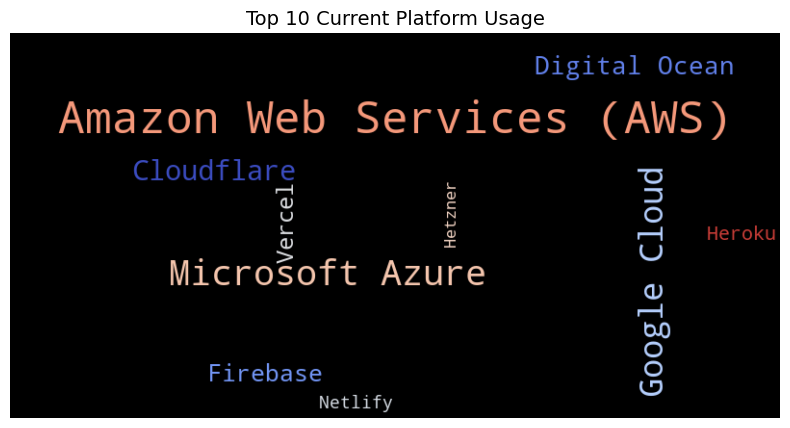

In [30]:
# Top 10 Platform

from wordcloud import WordCloud, STOPWORDS

platform_dict = dict(zip(Platform_current_year['Platform'], Platform_current_year['Count Platform'])) # Konversi DataFrame ke Dictionary

wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate_from_frequencies(platform_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hilangkan sumbu
plt.title("Top 10 Current Platform Usage", fontsize=14)
plt.show()

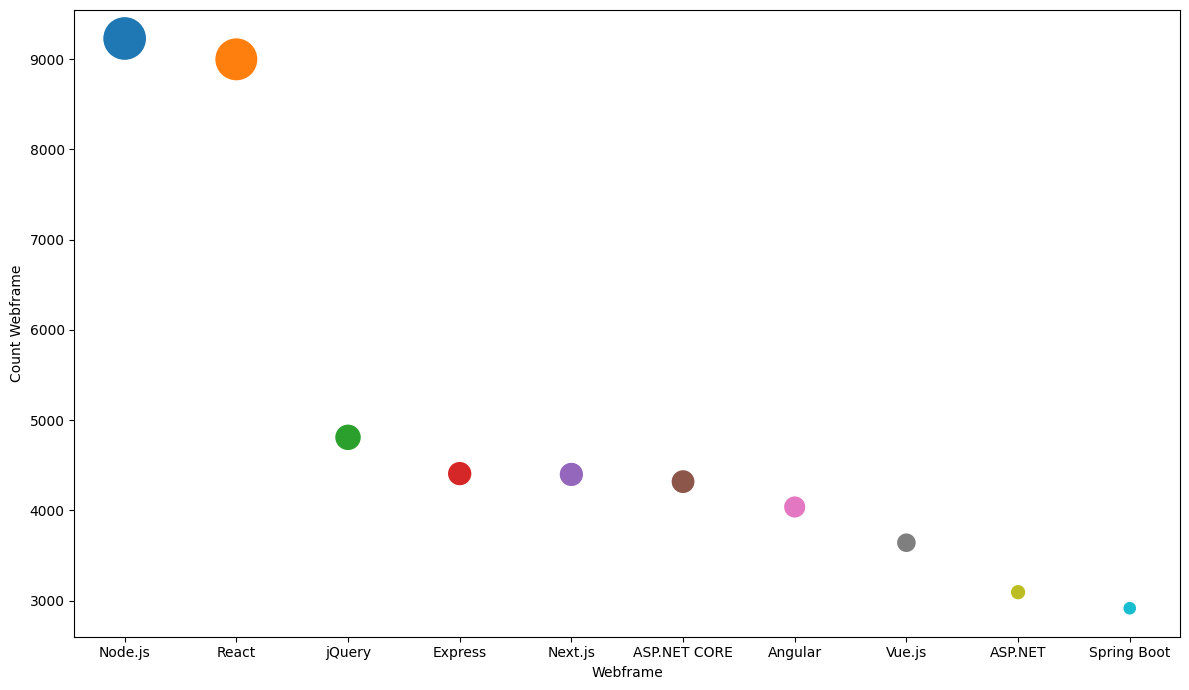

In [54]:
# Top 10 Webframe

plt.figure(figsize=(12,7))
sns.scatterplot(data = Webframe_current_year, x = 'Webframe', y = 'Count Webframe', size='Count Webframe', hue='Webframe', sizes=(100,1000), legend=False)
plt.tight_layout()

Future Technology Usage

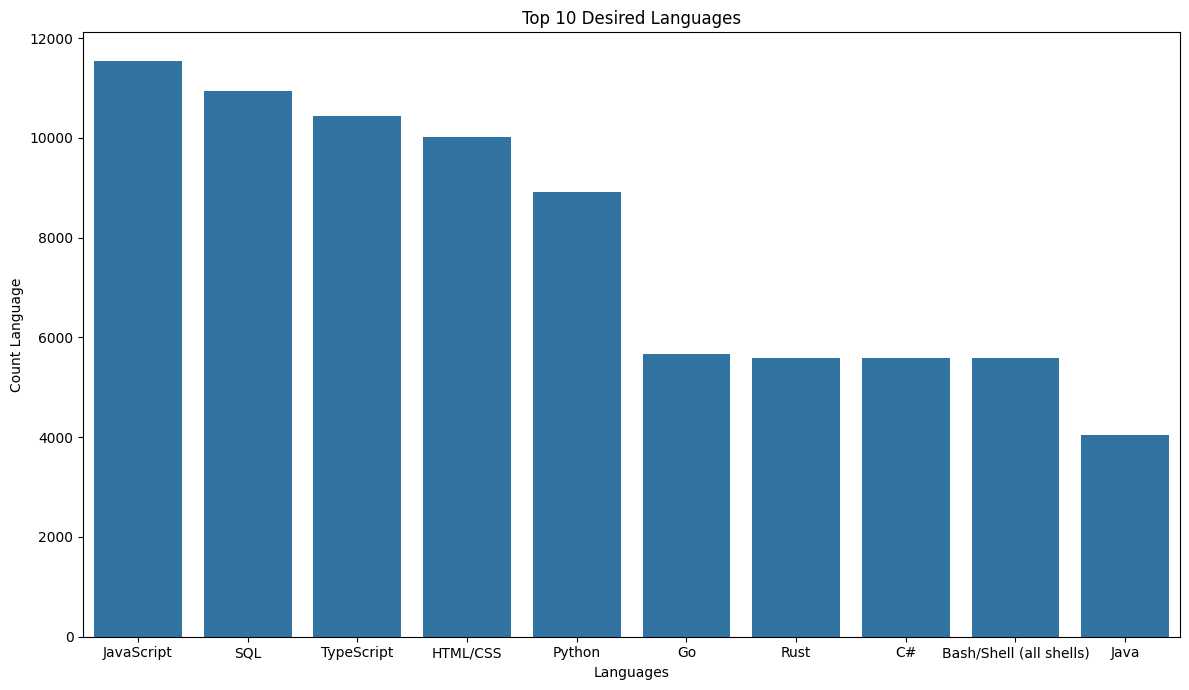

In [55]:
# Top 10 Languages

plt.figure(figsize=(12,7))
sns.barplot(data = languages_desired_year, x = 'Languages', y = 'Count Language')
plt.title("Top 10 Desired Languages")
plt.tight_layout()

Text(0.5, 0, 'Count Language')

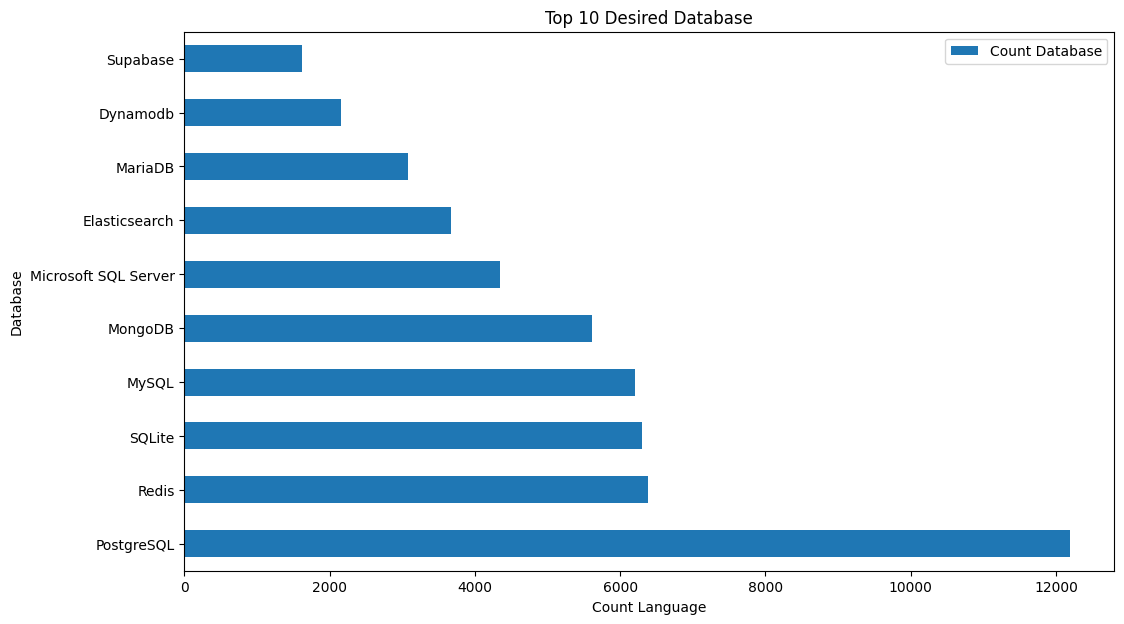

In [56]:
# Top 10 Database

database_desired_year.plot(kind='barh', x = 'Database', y = 'Count Database', figsize=(12,7))
plt.title("Top 10 Desired Database")
plt.xlabel("Count Language")

In [ ]:
#Top 10 Platform

fig = px.treemap(Platform_desired_year,
                 path = ['Platform'],
                 values= 'Count Platform')

fig.show()

In [71]:
# Top 10 Webframe

fig1 = px.scatter(Webframe_desired_year, 
                  x = 'Webframe', 
                  y = 'Count Webframe', 
                  size ='Count Webframe',
                  hover_name = 'Webframe',
                  size_max = 70,
                  color= 'Webframe')

fig1.show()

#### Demographic

In [ ]:
# Respondent by Age

df_age = df['Age'].value_counts().reset_index()

fig3 = px.pie(data_frame= df_age, names='Age', values='count')

fig3.show()

In [91]:
# Respondent count by Country

count_country = df['Country'].value_counts().reset_index()
count_country.columns = ['Country', 'Count']

fig4 = px.choropleth(
    count_country,
    locations = 'Country',
    locationmode= 'country names',
    color = 'Count',
    hover_name = 'Country',
    hover_data= ['Count'],
    title="Respondent Count by Country",
    color_continuous_scale="Blues",
    width=1200,
    height=600
)

fig4.show()

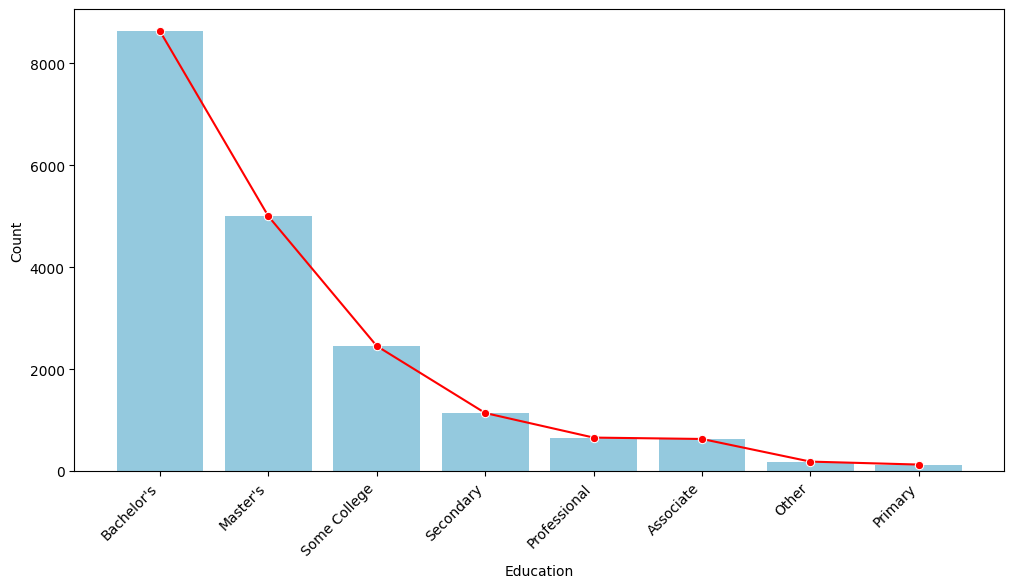

In [ ]:
# Respondent Distribution by Education Level

df_education = df['EdLevel'].value_counts().reset_index() # Create new dataframe
df_education.columns = ['Education', 'Count'] # Rename Columns

education_short_names = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's",
    "Some college/university study without earning a degree": "Some College",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary",
    "Something else": "Other",
    "Primary/elementary school": "Primary"
}

df_education["Education"] = df_education["Education"].replace(education_short_names)

plt.figure(figsize=(12,6))

ax = sns.barplot(
    data = df_education,
    x = 'Education',
    y = 'Count',
    color = 'skyblue') # Create barplot 

sns.lineplot(data = df_education,
    x = 'Education',
    y = 'Count',
    color = 'red',
    marker= 'o') # Create lineplot

plt.xticks(rotation=45, ha='right')
plt.show()

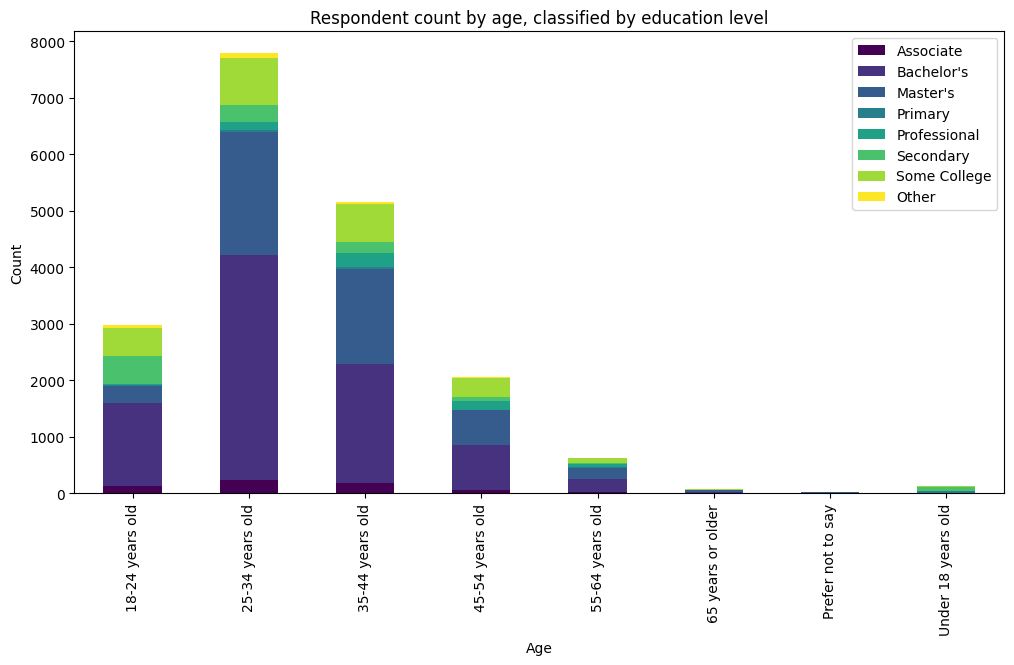

In [135]:
age_education = df.groupby(['Age', 'EdLevel']).size().unstack().fillna(0)

education_short_names = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's",
    "Some college/university study without earning a degree": "Some College",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary",
    "Something else": "Other",
    "Primary/elementary school": "Primary"
}

age_education.rename(columns=education_short_names, inplace=True)

age_education.plot(kind = 'bar',
                   stacked=True,
                   figsize=(12,6),
                   colormap='viridis')

plt.title("Respondent count by age, classified by education level")
plt.ylabel("Count")
plt.legend(loc='upper right')